In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.utils import resample

df = pd.read_csv('../data/AIDS_Classification_50000.csv')

df_majority = df[df.infected == 0]
df_minority = df[df.infected == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

print(df_balanced['infected'].value_counts())

df_balanced.to_csv('../data/AIDS_Classification_50000_balanced.csv', index=False)

X = df_balanced.drop('infected', axis=1)
y = df_balanced['infected']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


infected
0    34494
1    34494
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.grid(True)
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(cumulative_variance > 0.90)[0][0] + 1

pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

print(f'Number of components selected: {n_components}')


In [4]:
#rf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

num_components = range(1, X_scaled.shape[1] + 1)
cv_scores = []

for n in num_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    rf_classifier = RandomForestClassifier(n_estimators=500, max_features='sqrt', random_state=42)
    
    scores = cross_val_score(rf_classifier, X_pca, y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

plt.figure(figsize=(10, 5))
plt.plot(num_components, cv_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Scores for Different Numbers of PCA Components')
plt.grid(True)
plt.show()


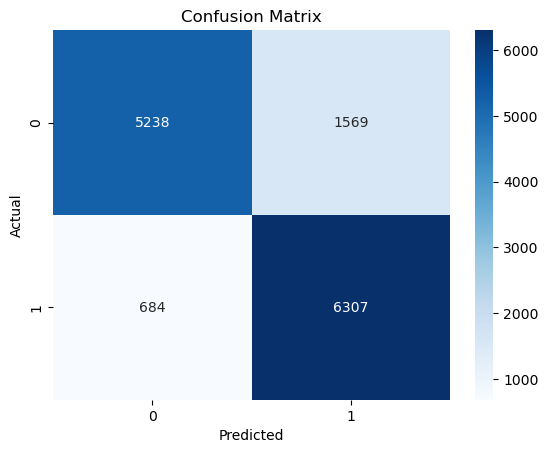

Negative Predictive Value (NPV): 0.8844984802431611


In [22]:
pca_final = PCA(n_components=7)
X_pca_final = pca_final.fit_transform(X_scaled)

rf_classifier = RandomForestClassifier(n_estimators=500, max_features='sqrt', random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")

In [23]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      6807
           1       0.80      0.90      0.85      6991

    accuracy                           0.84     13798
   macro avg       0.84      0.84      0.84     13798
weighted avg       0.84      0.84      0.84     13798



In [ ]:
#log reg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

cv_scores = []

for n in num_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    logistic_regression = LogisticRegression(C=0.1, solver='liblinear', random_state=42)
    
    scores = cross_val_score(logistic_regression, X_pca, y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

plt.figure(figsize=(10, 5))
plt.plot(num_components, cv_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Scores for Different Numbers of PCA Components')
plt.grid(True)
plt.show()


Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      6807
           1       0.64      0.70      0.67      6991

    accuracy                           0.65     13798
   macro avg       0.65      0.65      0.65     13798
weighted avg       0.65      0.65      0.65     13798



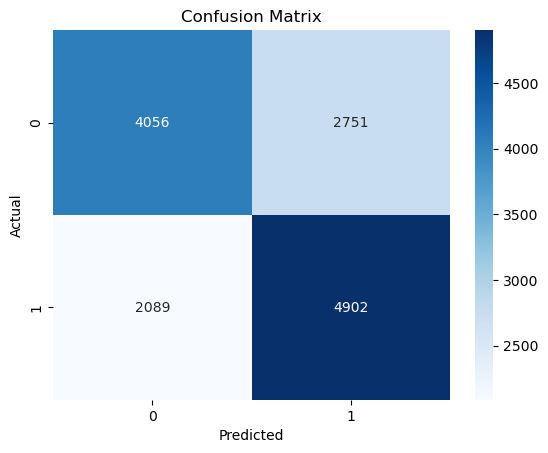

Negative Predictive Value (NPV): 0.6600488201790073


In [18]:
pca_final = PCA(n_components=3)
X_pca_final = pca_final.fit_transform(X_scaled)

logistic_regression = LogisticRegression(C=0.1, solver='liblinear', random_state=42)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")

In [ ]:
#adaboost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

cv_scores = []

for n in num_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    adaboost_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    
    scores = cross_val_score(adaboost_classifier, X_pca, y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

plt.figure(figsize=(10, 5))
plt.plot(num_components, cv_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Scores for Different Numbers of PCA Components')
plt.grid(True)
plt.show()


Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.59      0.63      6807
           1       0.64      0.70      0.67      6991

    accuracy                           0.65     13798
   macro avg       0.65      0.65      0.65     13798
weighted avg       0.65      0.65      0.65     13798



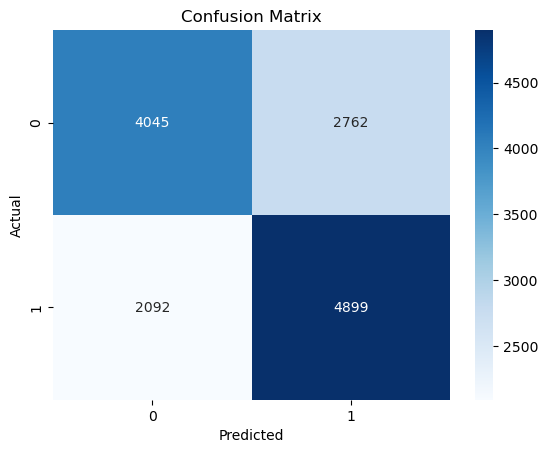

Negative Predictive Value (NPV): 0.6591168323284993


In [19]:
pca_final = PCA(n_components=3)
X_pca_final = pca_final.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.2, random_state=42)

adaboost_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")

In [ ]:
#catboost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

for n in num_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    catboost_classifier = CatBoostClassifier(n_estimators=50, learning_rate=0.1, verbose=0, random_state=42)
    
    scores = cross_val_score(catboost_classifier, X_pca, y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

plt.figure(figsize=(10, 5))
plt.plot(num_components, cv_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Scores for Different Numbers of PCA Components')
plt.grid(True)
plt.show()


Number of components used: 4
Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      6807
           1       0.64      0.69      0.67      6991

    accuracy                           0.65     13798
   macro avg       0.65      0.65      0.65     13798
weighted avg       0.65      0.65      0.65     13798



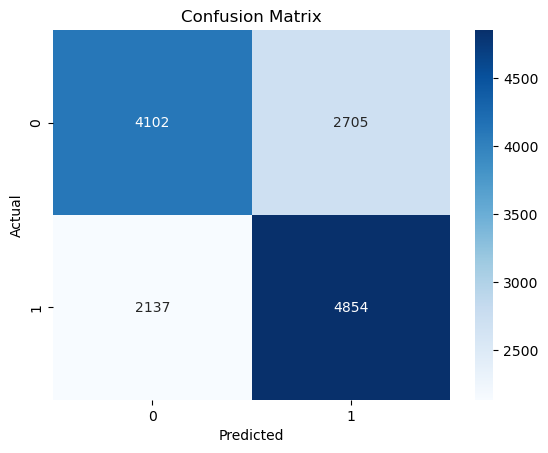

Negative Predictive Value (NPV): 0.6574771598012502


In [20]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

catboost_classifier = CatBoostClassifier(n_estimators=50, learning_rate=0.1, verbose=0, random_state=42)
catboost_classifier.fit(X_train, y_train)

y_pred = catboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Number of components used: 4')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")

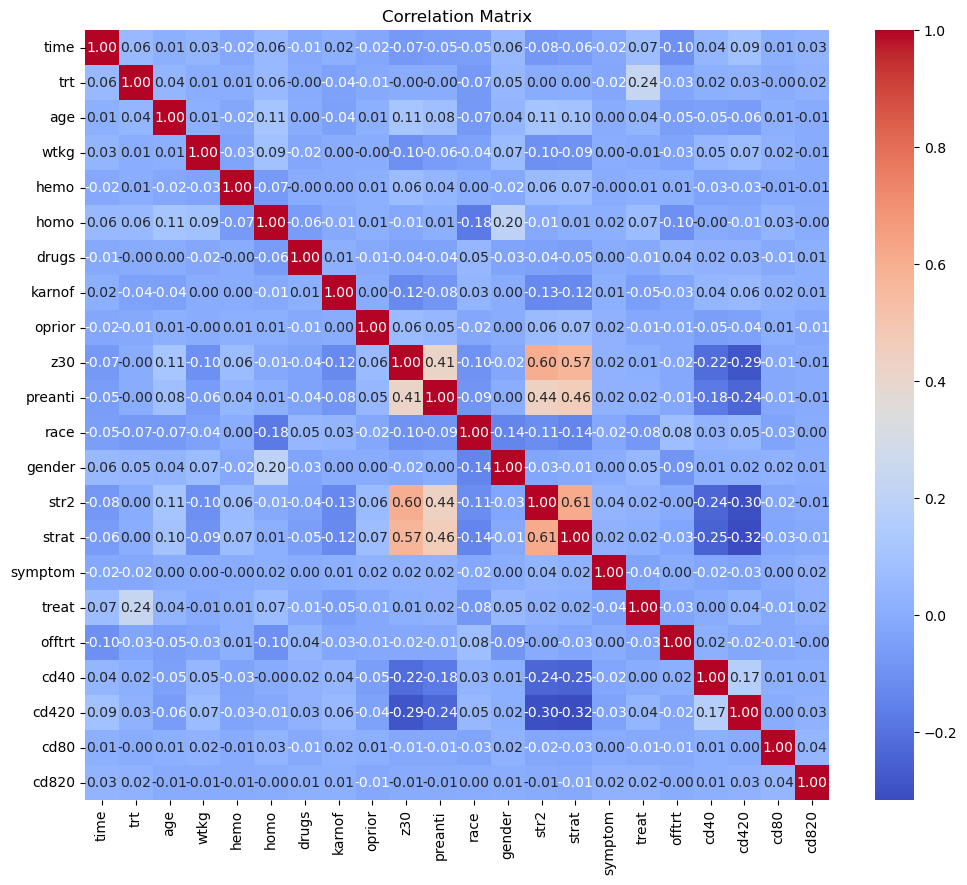

In [21]:
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()